Epoch 1/5


D:\anaconda-install\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5785 - loss: 0.6893 - val_accuracy: 0.6520 - val_loss: 0.6676
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6827 - loss: 0.6554 - val_accuracy: 0.7532 - val_loss: 0.5989
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7818 - loss: 0.5745 - val_accuracy: 0.8076 - val_loss: 0.4991
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8258 - loss: 0.4690 - val_accuracy: 0.8364 - val_loss: 0.4197
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8518 - loss: 0.3917 - val_accuracy: 0.8304 - val_loss: 0.3860
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8239 - loss: 0.3905
Test Accuracy: 0.8248
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


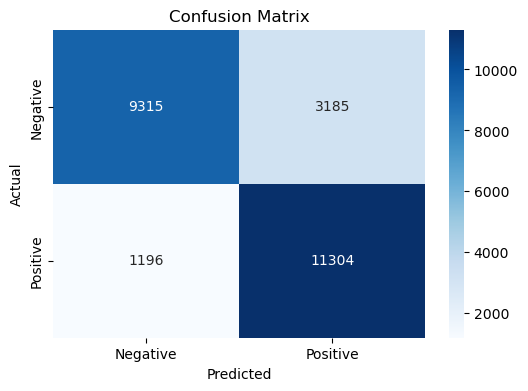


Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.75      0.81     12500
    Positive       0.78      0.90      0.84     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



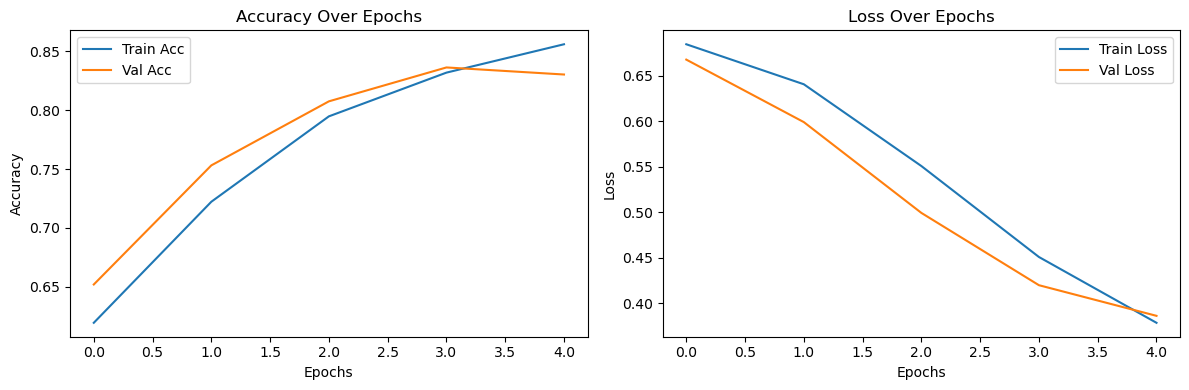

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load IMDB dataset (top 10,000 most common words)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
max_length = 200
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Build the model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict labels
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Plot training history
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
